#Import statements

In [ ]:
import numpy as np 
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 
import matplotlib.pyplot as plt 


Instructions for updating:
non-resource variables are not supported in the long term


#Seeding the dataset

In [ ]:
np.random.seed(100) 
tf.set_random_seed(100)

#Generate random data

In [ ]:
# Genrating random linear data 
# There will be 50 data points ranging from 0 to 50 
x = np.linspace(0, 50, 50) 
y = np.linspace(0, 50, 50) 

# Adding noise to the random linear data 
x += np.random.uniform(-4, 4, 50) 
y += np.random.uniform(-4, 4, 50) 

n = len(x) # Number of data points 


#Visualizing the training data

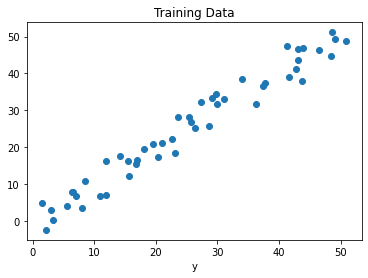

In [ ]:
# Plot of Training Data 
plt.scatter(x, y) 
plt.xlabel('x') 
plt.xlabel('y') 
plt.title("Training Data") 
plt.show() 


#Setting up placeholder values

In [ ]:
X = tf.placeholder("float") 
Y = tf.placeholder("float") 


#Setting up weights and bias

In [ ]:
W = tf.Variable(np.random.randn(), name = "W") 
b = tf.Variable(np.random.randn(), name = "b") 


#Learning rate and epochs

In [ ]:
learning_rate = 0.01
training_epochs = 1000


In [ ]:
# Hypothesis 
y_pred = tf.add(tf.multiply(X, W), b)   # y = mx +c

# Mean Squared Error Cost Function 
cost = tf.reduce_sum(tf.pow(y_pred-Y, 2)) / (2 * n)   

# Gradient Descent Optimizer 
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost) 

# Global Variables Initializer 
init = tf.global_variables_initializer() 


In [ ]:
# Starting the Tensorflow Session 
with tf.Session() as sess: 
	
	# Initializing the Variables 
	sess.run(init) 
	
	# Iterating through all the epochs 
	for epoch in range(training_epochs): 
		
		# Feeding each data point into the optimizer using Feed Dictionary 
		for (_x, _y) in zip(x, y): 
			sess.run(optimizer, feed_dict = {X : _x, Y : _y}) 
		
		# Displaying the result after every 50 epochs 
		if (epoch + 1) % 50 == 0: 
			# Calculating the cost a every epoch 
			c = sess.run(cost, feed_dict = {X : x, Y : y}) 
			print("Epoch", (epoch + 1), ": cost =", c, "W =", sess.run(W), "b =", sess.run(b)) 
	
	# Storing necessary values to be used outside the Session 
	training_cost = sess.run(cost, feed_dict ={X: x, Y: y}) 
	weight = sess.run(W) 
	bias = sess.run(b) 


Epoch 50 : cost = 4.7474155 W = 1.021131 b = -0.7005334
Epoch 100 : cost = 4.7415056 W = 1.0200144 b = -0.646762
Epoch 150 : cost = 4.7369723 W = 1.0190073 b = -0.5982708
Epoch 200 : cost = 4.733532 W = 1.0180993 b = -0.5545429
Epoch 250 : cost = 4.730956 W = 1.0172805 b = -0.5151095
Epoch 300 : cost = 4.7290626 W = 1.0165421 b = -0.4795492
Epoch 350 : cost = 4.727703 W = 1.015876 b = -0.4474812
Epoch 400 : cost = 4.726761 W = 1.0152756 b = -0.4185622
Epoch 450 : cost = 4.7261424 W = 1.014734 b = -0.39248353
Epoch 500 : cost = 4.725771 W = 1.0142456 b = -0.36896545
Epoch 550 : cost = 4.72559 W = 1.0138052 b = -0.3477572
Epoch 600 : cost = 4.7255497 W = 1.0134082 b = -0.32863238
Epoch 650 : cost = 4.7256145 W = 1.01305 b = -0.31138548
Epoch 700 : cost = 4.7257547 W = 1.012727 b = -0.29583147
Epoch 750 : cost = 4.725948 W = 1.0124357 b = -0.2818065
Epoch 800 : cost = 4.7261763 W = 1.012173 b = -0.26915887
Epoch 850 : cost = 4.726427 W = 1.0119362 b = -0.25775284
Epoch 900 : cost = 4.7266

In [ ]:
# Calculating the predictions 
predictions = weight * x + bias 
print("Training cost =", training_cost, "Weight =", weight, "bias =", bias, '\n') 


Training cost = 4.7272153 Weight = 1.0113562 bias = -0.229827 



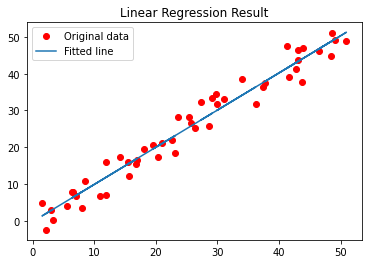

In [ ]:
plt.plot(x, y, 'ro', label ='Original data') 
plt.plot(x, predictions, label ='Fitted line') 
plt.title('Linear Regression Result') 
plt.legend() 
plt.show()